In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

   Rank  Major_code                                      Major  Total    Men  \
0     1        2419                      PETROLEUM ENGINEERING   2339   2057   
1     2        2416             MINING AND MINERAL ENGINEERING    756    679   
2     3        2415                  METALLURGICAL ENGINEERING    856    725   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258   1123   
4     5        2405                       CHEMICAL ENGINEERING  32260  21239   

   Women Major_category  ShareWomen  Sample_size  Employed      ...        \
0    282    Engineering    0.120564           36      1976      ...         
1     77    Engineering    0.101852            7       640      ...         
2    131    Engineering    0.153037            3       648      ...         
3    135    Engineering    0.107313           16       758      ...         
4  11021    Engineering    0.341631          289     25694      ...         

   Part_time  Full_time_year_round  Unemployed  Unemploy

In [2]:
recent_grads.shape

(173, 21)

In [3]:
recent_grads_noNA = recent_grads.dropna()

In [4]:
recent_grads_noNA.shape

(172, 21)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a1e4dc6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3a1e3dab70>]], dtype=object)

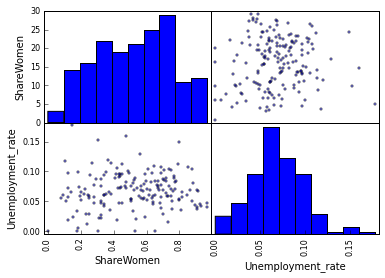

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads_noNA[["ShareWomen", "Unemployment_rate"]])

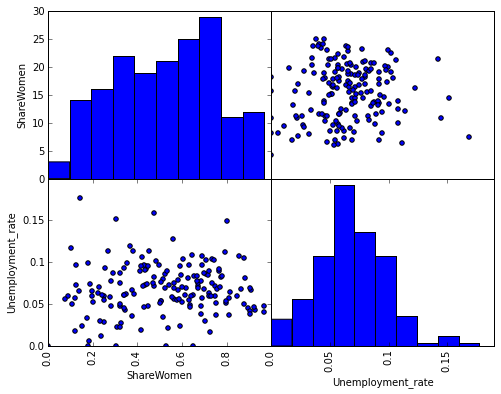

In [55]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)
ax1.set_ylabel("ShareWomen")
ax3.set_xlabel("ShareWomen")
ax3.set_ylabel("Unemployment_rate")
ax4.set_xlabel("Unemployment_rate")


ax1.hist(recent_grads_noNA['ShareWomen'])
ax2.scatter(recent_grads_noNA['Unemployment_rate'], recent_grads_noNA['ShareWomen'])
ax3.scatter(recent_grads_noNA['ShareWomen'], recent_grads_noNA['Unemployment_rate'])
ax4.hist(recent_grads_noNA['Unemployment_rate'])

ax1.set_ylim(0,30)
ax2.set_xlim(0.0,0.20)
ax3.set_xlim(0.0,1.0)
ax3.set_ylim(0.0,0.20)
ax4.set_xlim(0.00,0.19)

ax1.set_yticklabels([0,5,10,15,20,25,30])
ax3.set_yticklabels([0.00,0.05,0.10,0.15])
ax3.set_xticklabels([0.0,0.2,0.4,0.6,0.8], rotation=90)
ax4.set_xticklabels([0.00,0.05,0.10,0.15,0.20], rotation=90)




plt.subplots_adjust(wspace=0, hspace=0)


In [57]:
recent_grads_noNA["ShareMen"] = recent_grads_noNA["Men"] / recent_grads_noNA["Total"]

/opt/dsserver/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


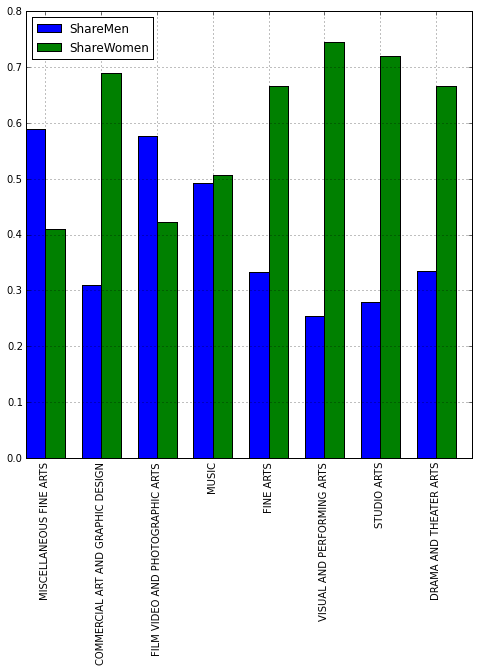

In [69]:
arts = recent_grads_noNA[recent_grads_noNA["Major_category"] == "Arts"]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

import numpy as np
locs = np.arange(0,len(arts["Major"].unique()))
bar_1 = ax.bar(left=locs, height=arts["ShareMen"].tolist(), width=0.35)
ax.set_xticklabels(arts["Major"].unique().tolist(), rotation=90)
offset_locs = locs+0.35
bar_2 = ax.bar(left=offset_locs, height=arts["ShareWomen"].tolist(), width=0.35, color="green")
ax.set_xticks(offset_locs)
plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()


